# Question 6

In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
from skimage import io
import matplotlib.pyplot as plt
import os


In [5]:
def load_images_from_folder(folder):
    images = []
    average_colors = []
    labels = []
    for filename in os.listdir(folder):
        if filename[0] == 'm':
            labels.append('red')
        else:
            labels.append('blue')
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            average = img.mean(axis=0).mean(axis=0)
            average_colors.append(average)
    return images, labels, average_colors

images, labels, averages = load_images_from_folder('images')

[127.27044213 109.19372081  90.62028813]
red


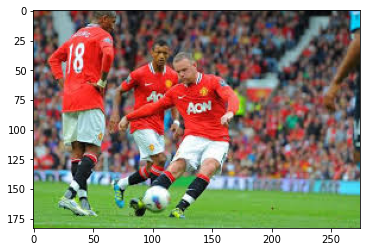

In [6]:
plt.imshow(images[71])
print(averages[71])
print(labels[71])

In [8]:
from collections import Counter

target_names = ['red', 'blue']
train = images
target = labels
predict_targets = ['red' if average[0] > average[1] else 'blue' for average in averages]

print(len(train), len(target), len(predict_targets))
print(Counter(targets).keys(), Counter(targets).values())
print(Counter(predict_targets).keys(), Counter(predict_targets).values())

122 122 122
dict_keys(['blue', 'red']) dict_values([64, 58])
dict_keys(['blue', 'red']) dict_values([39, 83])


              precision    recall  f1-score   support

         red       0.92      0.56      0.70        64
        blue       0.66      0.95      0.78        58

    accuracy                           0.75       122
   macro avg       0.79      0.76      0.74       122
weighted avg       0.80      0.75      0.74       122

Image number :  0  True Label : blue  Predicted Label :  blue
Image number :  1  True Label : blue  Predicted Label :  blue
Image number :  2  True Label : blue  Predicted Label :  red
Image number :  3  True Label : blue  Predicted Label :  blue
Image number :  4  True Label : blue  Predicted Label :  blue
Image number :  5  True Label : blue  Predicted Label :  blue
Image number :  6  True Label : blue  Predicted Label :  red
Image number :  7  True Label : blue  Predicted Label :  blue
Image number :  8  True Label : blue  Predicted Label :  red
Image number :  9  True Label : blue  Predicted Label :  blue
Image number :  10  True Label : blue  Predicted Label :

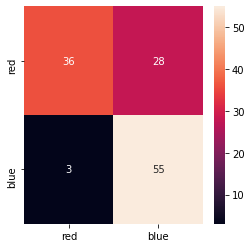

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(targets, predict_targets, target_names=target_names))
matrix = confusion_matrix(targets, predict_targets)

df_cm = pd.DataFrame(matrix, index = ['red', 'blue'], columns = ['red', 'blue'])
plt.figure(figsize = (4,4))
sn.heatmap(df_cm, annot=True)

for i in range(len(predict_targets)):
    print('Image number : ', i, ' True Label :', targets[i], ' Predicted Label : ', predict_targets[i])

# Question 7

In [103]:
def f(x):
    return np.cos(2 * np.pi * x)
npoints = 20
x = np.random.rand(npoints)[:, np.newaxis]
y = f(x) + np.random.normal(0, 1, npoints)[:, np.newaxis]

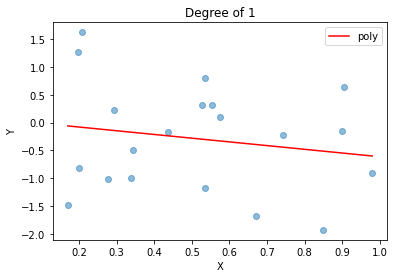

Mean Square Error for degree:  1  Is:  0.8619047330753362


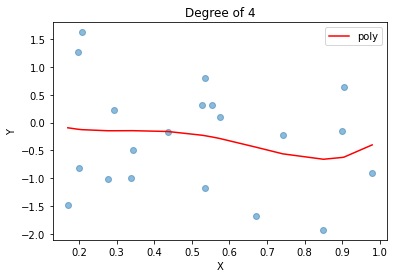

Mean Square Error for degree:  4  Is:  0.8558016355589079


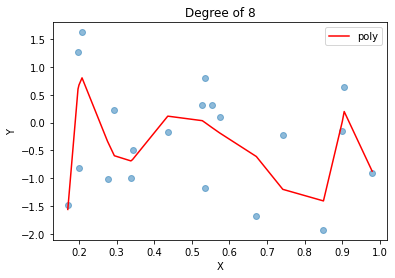

Mean Square Error for degree:  8  Is:  0.4777019042650602


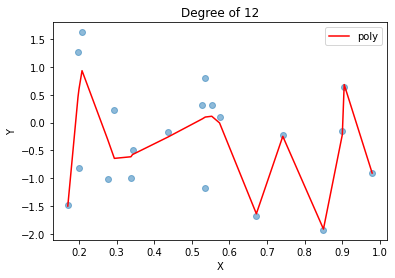

Mean Square Error for degree:  12  Is:  0.3373775010911285


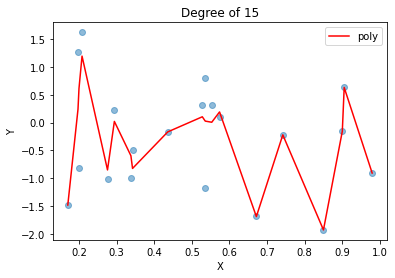

Mean Square Error for degree:  15  Is:  0.2869410787969532


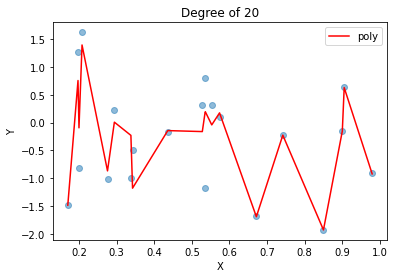

Mean Square Error for degree:  20  Is:  0.2278920836431868


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp

x.sort(axis=0)
x_train = x
x_test = x
y_train = y
y_test = y

degrees = [1 ,4, 8 ,12, 15, 20]
for i, d in enumerate(degrees):
    poly_model = make_pipeline(PolynomialFeatures(degree=d), linear_model.LinearRegression())
#     mse, bias, var = bias_variance_decomp(poly_model, x_train, y_train, x_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    poly_model.fit(x_train, y_train)

    fig = plt.figure()
    ax = plt.axes()
    title = 'Degree of ' + str(d)
    ax.set(xlabel='X', ylabel='Y', title=title)
    ax.scatter(x,y, alpha=0.5, cmap='viridis')
    ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

    ax.legend()
    plt.show()
    print('Mean Square Error for degree: ', d, ' Is: ', mean_squared_error(y_test, poly_model.predict(x_test)))
